In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score




In [12]:
train_data = pd.read_csv('D:\\train.csv')
test_data = pd.read_csv('D:\\test.csv')

In [13]:
print(train_data.head())
print(train_data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [14]:
print(train_data.isnull().sum())    # data cleaning check for missing value 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [15]:
# mising value and handling

train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)    # taman

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)             # krew swarboni kashti 


train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)      


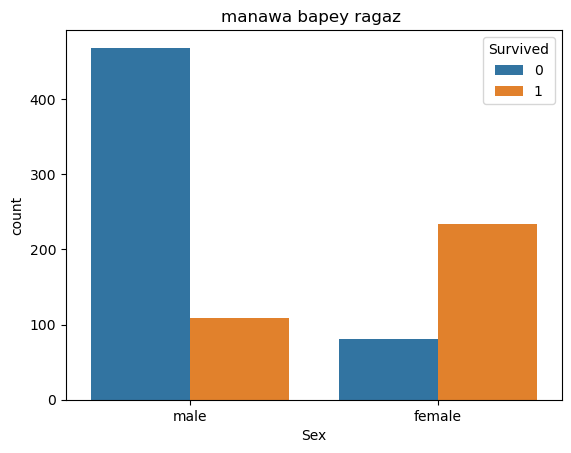

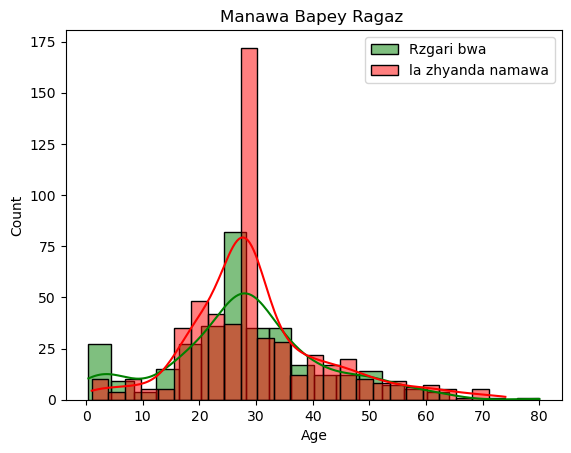

In [16]:
# EDA (shikarkrdni data analyse )
sns.countplot(data=train_data, x='Sex', hue='Survived')           # مانەوە بەپێی ڕەگەز لە داتا سێت
plt.title("manawa bapey ragaz ")
plt.show()  


sns.histplot(train_data[train_data['Survived'] == 1]['Age'], kde=True, color="green", label="Rzgari bwa ")
sns.histplot(train_data[train_data['Survived'] == 0]['Age'], kde=True, color="red", label="la zhyanda namawa")
plt.legend()
plt.title("Manawa Bapey Ragaz ")
plt.show()                                                       #  دابەشکردنی تەمەن بۆ ڕزگاربووان vs ئەوانەی ڕزگاریان نەبووە

In [17]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)   

In [ ]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1                # fmily future


train_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
test_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)        # columa napewistakan 



In [19]:

X = train_data.drop('Survived', axis=1)
y = train_data['Survived']                     # Separate features and target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1, random_state=42)  # جیاکردنەوەی training and testing set 

In [20]:

models = {
    'logistic regresion': LogisticRegression(max_iter=500),
    'random forest': RandomForestClassifier(random_state=42),
    'support vector machine': SVC(probability=True)
}                                                            # 3 jori model


for name, model in models.items():            # train models
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"{name} acuracy {accuracy_score(y_val, y_pred):.2f}")


logistic regresion acuracy 0.00
random forest acuracy 1.00
support vector machine acuracy 0.00


In [21]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} cv accuracy: {scores.mean():.2f}")               # ئەنجامدانی cross-validation بۆ هەر مۆدێلێک

logistic regresion cv accuracy: 0.79
random forest cv accuracy: 0.81
support vector machine cv accuracy: 0.67


In [22]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [10, None, 15],
    'min_samples_split': [6, 9, 15]                  # parameter grid
}


grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)                         
                                                      #Grid search


print(f"pashtrin Parameters: {grid.best_params_}")
best_rf_model = grid.best_estimator_                      # باشترین پارامێتەر و مۆدێل

pashtrin Parameters: {'max_depth': 15, 'min_samples_split': 15, 'n_estimators': 50}


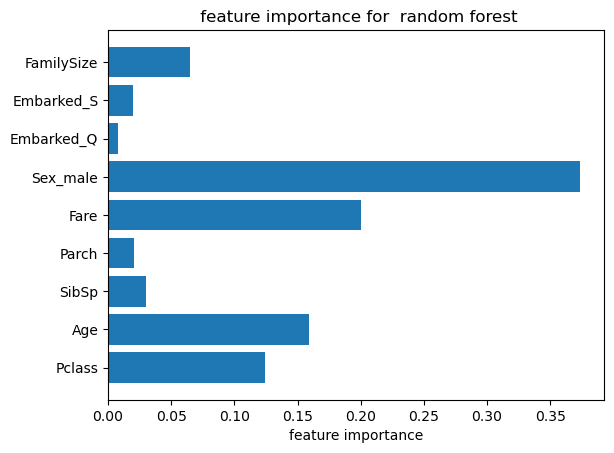

In [28]:
importances = best_rf_model.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("feature importance")
plt.title(" feature importance for  random forest")
plt.show()